## Note:
- This code has to be run under **python 2.5+**
- This part is to get the sentiment score through package ***pattern***

In [1]:
import pandas as pd
import re

In [2]:
# pattern need to be run under python 2.5+
# resource: https://www.clips.uantwerpen.be/pages/pattern-en#sentiment
from pattern.en import sentiment

In [3]:
# with open ('reviews.csv', 'r') as review:
#     df = pd.read_csv(review)
    
# col_name = ['index','movie', 'review_title', 'rate', 'body', 'helpful']
# df.columns = col_name

In [4]:
with open ('sentiment_vader_senticnet.csv', 'r') as review:
    df = pd.read_csv(review, index_col='index')
    df = df.drop(['Unnamed: 0'], axis=1)
#col_name = ['index','movie', 'review_title', 'rate', 'body', 'helpful']
#df.columns = col_name

In [5]:
for i in range(len(df['rate'])):
    score = df['rate'][i].split()[0]
    df.loc[i, 'rate']= score[:score.find('/')]

AttributeError: 'numpy.int64' object has no attribute 'split'

In [5]:
df

,movie,body,rate,vader_pos,vader_neg,senticnet_pos,senticnet_neg
index,,,,,,,
0,Code Name: K.O.Z.,A really horrible film which only aims to incr...,1,0.145500,-0.225000,0.575450,-0.690833
1,Code Name: K.O.Z.,"Shame on the directors, the purpose of this so...",1,0.132833,-0.239333,0.623316,-0.550000
2,Code Name: K.O.Z.,This is presumably the worst propaganda film e...,1,0.218714,-0.196667,0.481886,-0.626923
3,Code Name: K.O.Z.,Really awful. Don't waste your time. if even t...,1,0.237364,-0.166182,0.645097,-0.633750
4,Code Name: K.O.Z.,This was the awful movie I have ever watched i...,1,0.149600,-0.155273,0.547281,-0.421111
5,Code Name: K.O.Z.,This shameful movie is about government crimes...,1,0.163571,-0.212222,0.498937,-0.527143
6,Code Name: K.O.Z.,Kod Adı: KOZ gives us the Turkish government's...,10,0.156583,-0.135200,0.470381,-0.625926
7,Code Name: K.O.Z.,"In my opinion,it is a masterpiece and unforget...",10,0.245667,-0.090000,0.396833,-0.810000
8,Code Name: K.O.Z.,Dear IMDb! please add a no star option cause i...,1,0.239500,-0.137000,0.487828,-0.553333


In [9]:
def decide_using_pattern(sentence_list):
    '''give sentiment score based on the senticnet package
    and will reture two set of score, one for positive words
    and one for negative words
    return a list [pos_score, neg_score]'''
    positive_sentiment = []
    negative_sentiment = []
    ref = []
    for s in sentence_list:
        try:
            polarity = sentiment(s)
            # the first number return by pattern is the sentiment
            sentence_intense = polarity[0]
            if sentence_intense>=0:
                positive_sentiment.append(str(sentence_intense))
            else:
                negative_sentiment.append(str(sentence_intense))
        except:
            next
    
    if positive_sentiment == ref:
        pos_score = [0]
    if negative_sentiment == ref:
        neg_score = [0]
    score = [positive_sentiment, negative_sentiment]
    return score

In [10]:
def splitParagraph_to_Sentences(paragraph):
    ''' break a paragraph into sentences
        and return a list '''
    
    #   regular expressions are easiest (and fastest)
    sentenceEnders = re.compile('[.!?]')
    sentenceList = sentenceEnders.split(paragraph)
    for index, line in enumerate(sentenceList):
        if line:
            sentenceList[index] = line.strip()
        else:
            sentenceList.pop(index)
    return sentenceList

In [11]:
%%time
#for i in range(len(df.body)):
for i in range(len(df.body)):
    score_senti = None
    content = df.loc[i, 'body']
    content_list = splitParagraph_to_Sentences(content)
    score_senti = decide_using_pattern(content_list)
    df.loc[i, 'pattern_pos'] = ';'.join(score_senti[0])
    df.loc[i, 'pattern_neg'] = ';'.join(score_senti[1])
#sentiment (df.loc[0,'body'])[0]

/Users/xusibocn/anaconda/envs/project_py2/lib/python2.7/site-packages/pattern/text/__init__.py:1943: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if w in imap(lambda e: e.lower(), e):


CPU times: user 1min 7s, sys: 751 ms, total: 1min 7s
Wall time: 1min 9s


In [12]:
df

,movie,body,rate,vader_pos,vader_neg,senticnet_pos,senticnet_neg,pattern_pos,pattern_neg
index,,,,,,,,,
0,Code Name: K.O.Z.,A really horrible film which only aims to incr...,1,0.145500,-0.225000,0.575450,-0.690833,,-0.555555555556;-0.475;-0.0944444444444
1,Code Name: K.O.Z.,"Shame on the directors, the purpose of this so...",1,0.132833,-0.239333,0.623316,-0.550000,0.0;0.0458333333333;0.0;0.0;0.0;0.3;0.0,-0.336666666667;-0.1;-0.166666666667;-0.7
2,Code Name: K.O.Z.,This is presumably the worst propaganda film e...,1,0.218714,-0.196667,0.481886,-0.626923,0.0533333333333;0.0;0.325;0.307142857143;0.5;0...,-0.366666666667;-0.25;-0.233333333333;-0.35
3,Code Name: K.O.Z.,Really awful. Don't waste your time. if even t...,1,0.237364,-0.166182,0.645097,-0.633750,0.1;0.0;0.0;0.180833333333;0.4;0.16;0.0;0.0;0....,-1.0;-0.3125;-0.166666666667
4,Code Name: K.O.Z.,This was the awful movie I have ever watched i...,1,0.149600,-0.155273,0.547281,-0.421111,0.0;0.0;0.0;0.0;0.0;0.2;0.0;0.0;0.1;0.0;0.0431...,-1.0;-1.0;-0.2;-0.325
5,Code Name: K.O.Z.,This shameful movie is about government crimes...,1,0.163571,-0.212222,0.498937,-0.527143,0.0;0.0;0.0;0.25;0.0;0.4;0.0,-0.2;-1.0;-1.0
6,Code Name: K.O.Z.,Kod Adı: KOZ gives us the Turkish government's...,10,0.156583,-0.135200,0.470381,-0.625926,0.6;0.177083333333;0.0;0.122222222222;0.5;0.4,-0.2;-0.025;-0.0214285714286;-0.2;-0.05;-0.075...
7,Code Name: K.O.Z.,"In my opinion,it is a masterpiece and unforget...",10,0.245667,-0.090000,0.396833,-0.810000,0.225;0.483333333333;0.0;0.4,
8,Code Name: K.O.Z.,Dear IMDb! please add a no star option cause i...,1,0.239500,-0.137000,0.487828,-0.553333,0.0;0.0;0.283333333333;0.0;0.2;0.183333333333;...,-0.25


In [13]:
def remove_zero(a_string):
    a_list = a_string.split(';')
    ref = []
    for i in a_list:
        if not i == '':
            if i == '0.0':
                a_list.remove('0.0')
            elif i == '-0.0':
                a_list.remove('-0.0')
            output = a_list
        else:
            output = ['0']
    if output == ref:
        output = ['0']
    return output

In [14]:
def listmean (input_list):
    for i, v in enumerate(input_list):
        if v:
            input_list[i] = float(v)
        else:
            input_list[i] = 0
    new_list = input_list
    listmean = sum(new_list)/len(new_list)
    
    return listmean

In [15]:
review_sentiment = []
for i in range(len(df.index)):
#     index = df.loc[i, 'index']
#     movie = df.loc[i, 'movie']
#     review = df.loc[i, 'body']
#     rate = df.loc[i, 'rate']
#     vader_pos = df.loc[i,'vader_pos']
#     vader_neg = df.loc[i,'vader_neg']
#     senticnet_pos = df.loc[i,'senticnet_pos']
#     senticnet_neg = df.loc[i,'senticnet_neg']
    pattern_pos = df.loc[i,'pattern_pos']
    pattern_neg = df.loc[i,'pattern_neg']
    pattern_pos_mean = listmean(remove_zero(pattern_pos))
    pattern_neg_mean = listmean(remove_zero(pattern_neg))
    df.loc[i,'pattern_pos'] = pattern_pos_mean
    df.loc[i,'pattern_neg'] = pattern_neg_mean

In [16]:
df

,movie,body,rate,vader_pos,vader_neg,senticnet_pos,senticnet_neg,pattern_pos,pattern_neg
index,,,,,,,,,
0,Code Name: K.O.Z.,A really horrible film which only aims to incr...,1,0.145500,-0.225000,0.575450,-0.690833,0,-0.375
1,Code Name: K.O.Z.,"Shame on the directors, the purpose of this so...",1,0.132833,-0.239333,0.623316,-0.550000,0.115278,-0.325833
2,Code Name: K.O.Z.,This is presumably the worst propaganda film e...,1,0.218714,-0.196667,0.481886,-0.626923,0.274873,-0.3
3,Code Name: K.O.Z.,Really awful. Don't waste your time. if even t...,1,0.237364,-0.166182,0.645097,-0.633750,0.219083,-0.493056
4,Code Name: K.O.Z.,This was the awful movie I have ever watched i...,1,0.149600,-0.155273,0.547281,-0.421111,0.167893,-0.63125
5,Code Name: K.O.Z.,This shameful movie is about government crimes...,1,0.163571,-0.212222,0.498937,-0.527143,0.216667,-0.733333
6,Code Name: K.O.Z.,Kod Adı: KOZ gives us the Turkish government's...,10,0.156583,-0.135200,0.470381,-0.625926,0.359861,-0.103122
7,Code Name: K.O.Z.,"In my opinion,it is a masterpiece and unforget...",10,0.245667,-0.090000,0.396833,-0.810000,0.369444,0
8,Code Name: K.O.Z.,Dear IMDb! please add a no star option cause i...,1,0.239500,-0.137000,0.487828,-0.553333,0.14197,-0.25


In [17]:
# using the average of scores from two sentiment analysis methods, and assign emotion level to the review
# comparing with the rate, if they are not match, label as sarcasm

In [18]:
df.head(10)

,movie,body,rate,vader_pos,vader_neg,senticnet_pos,senticnet_neg,pattern_pos,pattern_neg
index,,,,,,,,,
0,Code Name: K.O.Z.,A really horrible film which only aims to incr...,1,0.145500,-0.225000,0.575450,-0.690833,0,-0.375
1,Code Name: K.O.Z.,"Shame on the directors, the purpose of this so...",1,0.132833,-0.239333,0.623316,-0.550000,0.115278,-0.325833
2,Code Name: K.O.Z.,This is presumably the worst propaganda film e...,1,0.218714,-0.196667,0.481886,-0.626923,0.274873,-0.3
3,Code Name: K.O.Z.,Really awful. Don't waste your time. if even t...,1,0.237364,-0.166182,0.645097,-0.633750,0.219083,-0.493056
4,Code Name: K.O.Z.,This was the awful movie I have ever watched i...,1,0.149600,-0.155273,0.547281,-0.421111,0.167893,-0.63125
5,Code Name: K.O.Z.,This shameful movie is about government crimes...,1,0.163571,-0.212222,0.498937,-0.527143,0.216667,-0.733333
6,Code Name: K.O.Z.,Kod Adı: KOZ gives us the Turkish government's...,10,0.156583,-0.135200,0.470381,-0.625926,0.359861,-0.103122
7,Code Name: K.O.Z.,"In my opinion,it is a masterpiece and unforget...",10,0.245667,-0.090000,0.396833,-0.810000,0.369444,0
8,Code Name: K.O.Z.,Dear IMDb! please add a no star option cause i...,1,0.239500,-0.137000,0.487828,-0.553333,0.14197,-0.25


In [19]:
for i in range(len(df.index)):
    vader_pos = df.loc[i,'vader_pos']
    vader_neg = df.loc[i,'vader_neg']
    senticnet_pos = df.loc[i,'senticnet_pos']
    senticnet_neg = df.loc[i,'senticnet_neg']
    pattern_pos = df.loc[i,'pattern_pos']
    pattern_neg = df.loc[i,'pattern_neg']
    pos = (vader_pos+senticnet_pos+pattern_pos)/3
    neg = (vader_neg+senticnet_neg+pattern_neg)/3
    df.loc[i,'pos'] = pos
    df.loc[i,'neg'] = neg
    df.loc[i,'sentiment'] = pos+neg

In [63]:
df.head(10)

,movie,body,rate,vader_pos,vader_neg,senticnet_pos,senticnet_neg,pattern_pos,pattern_neg,pos,neg,sentiment
index,,,,,,,,,,,,
0,Code Name: K.O.Z.,A really horrible film which only aims to incr...,1,0.145500,-0.225000,0.575450,-0.690833,0,-0.375,0.240317,-0.430278,-0.189961
1,Code Name: K.O.Z.,"Shame on the directors, the purpose of this so...",1,0.132833,-0.239333,0.623316,-0.550000,0.115278,-0.325833,0.290476,-0.371722,-0.081247
2,Code Name: K.O.Z.,This is presumably the worst propaganda film e...,1,0.218714,-0.196667,0.481886,-0.626923,0.274873,-0.3,0.325158,-0.374530,-0.049372
3,Code Name: K.O.Z.,Really awful. Don't waste your time. if even t...,1,0.237364,-0.166182,0.645097,-0.633750,0.219083,-0.493056,0.367181,-0.430996,-0.063815
4,Code Name: K.O.Z.,This was the awful movie I have ever watched i...,1,0.149600,-0.155273,0.547281,-0.421111,0.167893,-0.63125,0.288258,-0.402545,-0.114287
5,Code Name: K.O.Z.,This shameful movie is about government crimes...,1,0.163571,-0.212222,0.498937,-0.527143,0.216667,-0.733333,0.293059,-0.490899,-0.197841
6,Code Name: K.O.Z.,Kod Adı: KOZ gives us the Turkish government's...,10,0.156583,-0.135200,0.470381,-0.625926,0.359861,-0.103122,0.328942,-0.288083,0.040859
7,Code Name: K.O.Z.,"In my opinion,it is a masterpiece and unforget...",10,0.245667,-0.090000,0.396833,-0.810000,0.369444,0,0.337315,-0.300000,0.037315
8,Code Name: K.O.Z.,Dear IMDb! please add a no star option cause i...,1,0.239500,-0.137000,0.487828,-0.553333,0.14197,-0.25,0.289766,-0.313444,-0.023679


In [75]:
for i in range(len(df.index)):
    sentiment = df.loc[i,'sentiment']
    rate = df.loc[i,'rate']
#     if sentiment < 0 and rate > 5:
#         print ('sarcasm:', i)
    if sentiment*20 > 4 and rate <3:
        print ('sarcasm id:', i)
        print ('rate:', df.loc[i, 'rate'])
        print (df.loc[i, 'body'])

('sarcasm id:', 444)
('rate:', 1)
Was I inhaling finger-nail polish remover, or was this movie the greatest story ever told?  I laughed, I cried, well, I mostly cried, and I vomited profusely for weeks after the viewing of Torgo's mighty and powerful thighs. I can't wait for the sequel, MANOS 2: BACK IN THE HABIT.  That movie will be about Torgo's kooky adventure when the Master dies, and torgo has to pretend he is alive by putting sunglasses over his glazed and bloodshot eyes.  It's a totally original viewing experience!  But other than the beauty that is torgo, this movie blew.
('sarcasm id:', 701)
('rate:', 1)
Wow, this film isn't at the bottom of the bottom 100?? Unbelievable.  Anyway, what a testament to the power of MST3K that so many of the films they riffed appear on that hallowed list.  Torgo rules!
('sarcasm id:', 740)
('rate:', 1)
What a masterpiece, truly the pinnacle of Hal P. Warren's film career. I really enjoyed the driving sequences in the first 20 minutes of the film,

('sarcasm id:', 5330)
('rate:', 2)
I don't recommend waiting for this movie on DVD, since movie tickets are cheaper, and you will not want to see this garbage more than once. However, you only live once, and you shouldn't waste your precious time sitting through the most unbearable hour and a half ever.If you've never had the experience of wanting to leave a movie early, and want that particular pleasure, then by all means go spend your money on "Epic Movie." The only reason I gave this a 2 and not a 1 is that Kal Penn is almost worth buying the ticket for. In fact, you should buy the ticket for him, since I don't think even he would pay up to see it.
('sarcasm id:', 5412)
('rate:', 2)
This movie was hilarious Defintly Better than date movie It was so funny I laughed through the whole Movie. It spoofs: Pirates of the Caribbean, Superman returns, The DA Vinci Code, Chronicles of Narnia, Charlie & The Chocolate Factory,X-men, Harry potter, Nacho Libre, Snakes on a plane. All were Hilario

In [72]:
print 'rate:', df.loc[740,'rate']
print 'sentiment:', df.loc[740, 'sentiment']
print 'review:', df.loc[740, 'body']

rate: 1
sentiment: 0.30879482038427825
review: What a masterpiece, truly the pinnacle of Hal P. Warren's film career. I really enjoyed the driving sequences in the first 20 minutes of the film, truly haunting! Torgo was a brilliant character as well, from his very sexually appealing passes at the women in this film (how did they resist the charms of Torgo?) to his amazing strength that only requires him to tap Hal with his death stick to knock him out. Other great features of this movie include: the Master's beautiful cape, Hal's widows peak in the mirror (what a camera shot!), and of course Torgo's knees. 100000000000000000000/10!!! The best movie ever, period.


In [ ]:
# the next step is to test the model, the weight and using other dataset to test the model.
# or I can use this method to predict the score.

In [102]:
for i in range(len(df.index)):
    sentiment = df.loc[i,'sentiment']
    rate = df.loc[i,'rate']
#     if sentiment < 0 and rate > 5:
#         print ('sarcasm:', i)
#     if sentiment > 0 and rate <5:
#         df.loc[i, 'classes'] = 1
    if sentiment < 0 and rate >5:
        df.loc[i, 'classes'] = 1
    else:
        df.loc[i, 'classes'] = 0

In [100]:
df.classes

index
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      1.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
9558    0.0
9559    0.0
9560    1.0
9561    1.0
9562    0.0
9563    0.0
9564    1.0
9565    0.0
9566    1.0
9567    0.0
9568    1.0
9569    0.0
9570    0.0
9571    1.0
9572    0.0
9573    0.0
9574    0.0
9575    0.0
9576    0.0
9577    1.0
9578    0.0
9579    0.0
9580    0.0
9581    1.0
9582    1.0
9583    1.0
9584    0.0
9585    0.0
9586    1.0
9587    1.0
Name: classes, Length: 9588, dtype: float64

In [37]:
import matplotlib.pyplot as plt

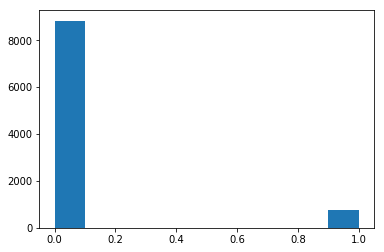

In [103]:
plt.hist(df.classes)
plt.show()

In [20]:
from sklearn import linear_model

In [80]:
reg = linear_model.LinearRegression(normalize=True)

In [145]:
from sklearn.model_selection import cross_val_predict

In [105]:
df2 = df[df.classes == 0]
df2

,movie,body,rate,vader_pos,vader_neg,senticnet_pos,senticnet_neg,pattern_pos,pattern_neg,pos,neg,sentiment,class,classes
index,,,,,,,,,,,,,,
0,Code Name: K.O.Z.,A really horrible film which only aims to incr...,1,0.145500,-0.225000,0.575450,-0.690833,0,-0.375,0.240317,-0.430278,-0.189961,0.0,0.0
1,Code Name: K.O.Z.,"Shame on the directors, the purpose of this so...",1,0.132833,-0.239333,0.623316,-0.550000,0.115278,-0.325833,0.290476,-0.371722,-0.081247,0.0,0.0
2,Code Name: K.O.Z.,This is presumably the worst propaganda film e...,1,0.218714,-0.196667,0.481886,-0.626923,0.274873,-0.3,0.325158,-0.374530,-0.049372,0.0,0.0
3,Code Name: K.O.Z.,Really awful. Don't waste your time. if even t...,1,0.237364,-0.166182,0.645097,-0.633750,0.219083,-0.493056,0.367181,-0.430996,-0.063815,0.0,0.0
4,Code Name: K.O.Z.,This was the awful movie I have ever watched i...,1,0.149600,-0.155273,0.547281,-0.421111,0.167893,-0.63125,0.288258,-0.402545,-0.114287,0.0,0.0
5,Code Name: K.O.Z.,This shameful movie is about government crimes...,1,0.163571,-0.212222,0.498937,-0.527143,0.216667,-0.733333,0.293059,-0.490899,-0.197841,0.0,0.0
6,Code Name: K.O.Z.,Kod Adı: KOZ gives us the Turkish government's...,10,0.156583,-0.135200,0.470381,-0.625926,0.359861,-0.103122,0.328942,-0.288083,0.040859,0.0,0.0
7,Code Name: K.O.Z.,"In my opinion,it is a masterpiece and unforget...",10,0.245667,-0.090000,0.396833,-0.810000,0.369444,0,0.337315,-0.300000,0.037315,0.0,0.0
8,Code Name: K.O.Z.,Dear IMDb! please add a no star option cause i...,1,0.239500,-0.137000,0.487828,-0.553333,0.14197,-0.25,0.289766,-0.313444,-0.023679,0.0,0.0


In [192]:
df_train = df2[:6500]
df_test = df2[6500:]

In [193]:
x = df_train[['vader_pos', 'vader_neg','senticnet_pos', 'senticnet_neg', 'pattern_pos', 'pattern_neg']]
x = x*20
y = df_train.rate

In [194]:
x_all = df_train[['pos','neg']]
#x = x*20
y = df_train.rate
x_test_all = df_test[['pos','neg']]
#x_test = x_test*20
y_test_all = df_test.rate

In [216]:
x_all.loc[:,'y'] = y

/Users/xusibocn/anaconda/envs/project_py2/lib/python2.7/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [221]:
x_all[:6500]

,pos,neg,y
index,,,
0,0.240317,-0.430278,1.0
1,0.290476,-0.371722,1.0
2,0.325158,-0.374530,1.0
3,0.367181,-0.430996,1.0
4,0.288258,-0.402545,1.0
5,0.293059,-0.490899,1.0
6,0.328942,-0.288083,10.0
7,0.337315,-0.300000,10.0
8,0.289766,-0.313444,1.0


In [195]:
reg.fit(x_all, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [198]:
predicted_y.

AttributeError: 'LinearRegression' object has no attribute 'conf_int'

In [199]:
predicted_y = reg.predict(x_test_all)

In [200]:
metrics.mean_squared_error(y_test_all, predicted_y)

4.916774558026144

In [202]:
reg.predict

TypeError: predict() takes exactly 2 arguments (0 given)

In [204]:
import statsmodels.formula.api as smf

In [225]:
lm1 = smf.ols(formula= 'y~pos+neg', data = x_all).fit()
#x_all[:6500]

In [229]:
lm1.pvalues
lm1.conf_int()
lm1.rsquared

0.28660196602466437

In [238]:
x_test = df_test[['vader_pos', 'vader_neg','senticnet_pos', 'senticnet_neg', 'pattern_pos', 'pattern_neg']]
#x_test = x_test
y_test = df_test.rate

In [239]:
x_test['y'] = y_test

/Users/xusibocn/anaconda/envs/project_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [240]:
x_test

,vader_pos,vader_neg,senticnet_pos,senticnet_neg,pattern_pos,pattern_neg,y
index,,,,,,,
7035,0.203200,-0.166714,0.587115,-0.665556,0.0962963,-0.440404,2
7036,0.252556,-0.148920,0.589425,-0.747692,0.168035,-0.432986,2
7037,0.113333,-0.288714,0.485647,-0.719091,0.0898148,-0.33625,2
7038,0.108900,-0.157846,0.518375,-0.630286,0.158929,-0.262778,2
7039,0.084429,-0.074000,0.474000,-0.817500,0.195833,-0.4,2
7040,0.195273,-0.207636,0.440833,-0.480000,0.247083,-0.372454,2
7041,0.052250,-0.134200,0.567529,-0.737000,0.245455,-0.6,2
7042,0.284429,-0.127875,0.353647,-0.585333,0.174702,-0.18375,2
7043,0.199750,-0.158500,0.525857,-0.522000,0.525,-0.654167,2


In [244]:
lm2 = smf.ols(formula= 'y ~ vader_pos + vader_neg + senticnet_pos + senticnet_neg', data = x_test).fit()

In [247]:
lm2.pvalues
lm2.rsquared

0.1877888329693893

In [164]:
predicted_y = reg.predict(x_test)

In [130]:
len(predicted_y)
tick = range(2334)
#round(predicted_y, 0)
newy = predicted_y.tolist()

In [136]:
for i, v in enumerate(newy):
    newy[i] = round (v)
    if newy[i] <= 0:
        newy[i] = 1

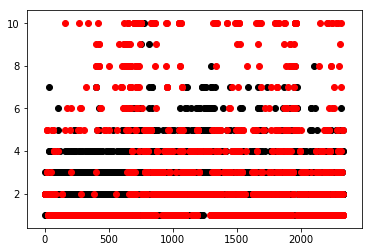

In [137]:
plt.scatter(tick, newy,  color='black')
plt.scatter(tick, y_test, color='red')
plt.show()

In [166]:
metrics.mean_squared_error(y_test, predicted_y)

4.812544584093122

In [52]:
from sklearn import metrics

In [90]:
reg.coef_

array([ 0.93074949,  0.75962516,  0.16448161, -0.01998764,  0.31823662,
        0.14790303])

In [140]:
x1 = df_train[['vader_pos', 'vader_neg']]
x1 = x1*10
y1 = df_train.rate

In [141]:
reg.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [142]:
x_test1 = df_test[['vader_pos', 'vader_neg']]
x_test1 = x_test1*10
y_test1 = df_test.rate

In [143]:
predicted_y1 = reg.predict(x_test1)

In [158]:
metrics.mean_squared_error(y_test1, predicted_y1)

5.010382633611691

In [76]:
# to test the sarcasm detection method that I presented, I could use some other data set with label to test the model.

array([3.37390822, 6.14404611, 5.18044296, ..., 2.58129017, 3.49039512,
       2.50527163])

In [146]:
predicted = cross_val_predict(reg, x1, y1, cv=10)

In [151]:
metrics.mean_squared_error(y1, predicted)

4.831538461538462

In [150]:
for i, v in enumerate(predicted):
    predicted[i] = round (v)
    if predicted[i] <= 0:
        predicted[i] = 1

In [156]:
metrics.mean_squared_error(y1, predicted)

4.831538461538462

In [167]:
from sklearn.feature_selection import SelectFromModel

In [168]:
model = SelectFromModel(reg, prefit=True)

In [169]:
model.get_support()

array([ True,  True, False, False, False, False])

In [249]:
# the next step is to predict the rate by the variables that I have 
# by combining various packages to get the sentiment score of the review and find the result could be used for two things
# 1. to predict the rating based on the results from different packages (using linear regression, remove those labeled as sarcasm)
# 2. using some other dataset to test the idea of sarcasm detection.